<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/uniapprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks as Universal Approximators
By Fayyaz Minhas


A single hidden layer neural network can be a universal function approximator. Here, we write a simple code to test this. We have a single hidden layer neuron in which there are $P$ neurons, each with sigmoidal activation function. The objective is to find the weights of each of the inputs so that the weighted summation of the outputs of the P neurons give a good approximation of the given function.

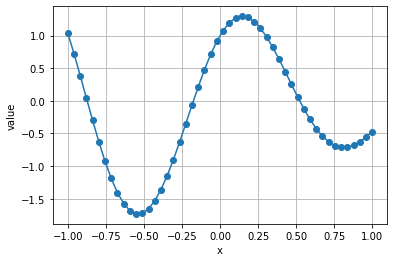

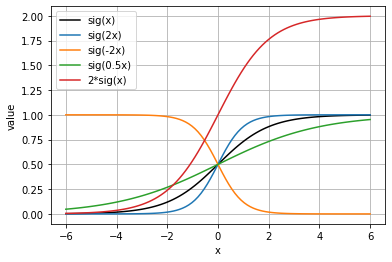

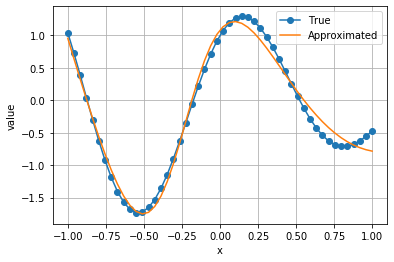

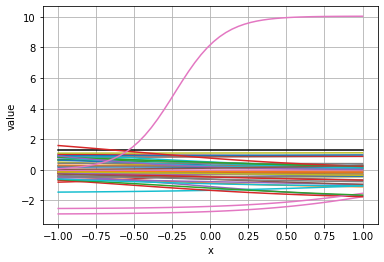

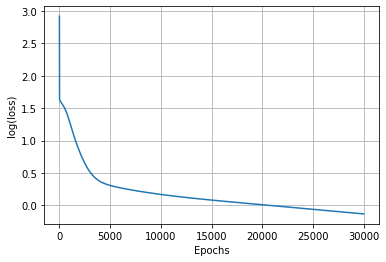

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  2 11:54:00 2020

@author: fayya
"""

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
plt.close('all')

def func(x):
  return np.sin(4*x)+np.cos(5*x)

#Let's generate some data
x = np.linspace(-1,+1,50)
g = func(x)
plt.figure(); plt.plot(x,g,'o-');plt.xlabel('x');plt.ylabel('value');plt.grid();plt.show()

x = torch.from_numpy(np.atleast_2d(x).T).float()
y = torch.from_numpy(g).float()

xx = torch.from_numpy(np.atleast_2d(np.linspace(-6,6,100)).T).float()
plt.figure();
plt.plot(xx,torch.sigmoid(xx),'k');
plt.plot(xx,torch.sigmoid(2*xx));
plt.plot(xx,torch.sigmoid(-2*xx));
plt.plot(xx,torch.sigmoid(0.5*xx));
plt.plot(xx,2*torch.sigmoid(xx));
plt.legend(['sig(x)','sig(2x)','sig(-2x)','sig(0.5x)','2*sig(x)'])
plt.xlabel('x');plt.ylabel('value');plt.grid();plt.show()

N, D_in,D_out = len(x), 1, 1

P = 50
wb = torch.randn((P,D_in+1),requires_grad=True) #d_in to P
#ub = torch.randn((P,P+1),requires_grad=True) #P to P
vb = torch.randn(P+1,requires_grad=True) #P to one
 
def approximator(x):    
    z = torch.sigmoid(x@wb[:,1:].T+wb[:,0])     #z_i = 𝑓(𝒘_𝑖^𝑇 𝒙+𝑏_𝑖 )
    #z = torch.sigmoid(z@ub[:,1:].T+ub[:,0])     #z_i = 𝑓(u_𝑖^𝑇 𝒙+𝑏_𝑖 )
    G = z@vb[1:]+vb[0]    # G = \sum_{i=1}^P v_i*z_i + v_0
    return G

optimizer = optim.SGD([vb,wb], lr=1e-3) #remember to add ub if it is used
L = []
for epoch in range(int(3e4)):
    G = approximator(x)    # compute output
    obj = torch.sum((G-y)**2) # compute error
    obj.backward() #backprop
    optimizer.step()
    optimizer.zero_grad()
    L.append(obj.item())

    
plt.figure(); plt.plot(x,g,'o-');plt.plot(x,approximator(x).detach().numpy());
plt.xlabel('x');plt.ylabel('value');plt.grid();plt.legend(['True','Approximated']);plt.show()
#%%
plt.figure(); 
plt.plot(x,[float(vb[0].detach().numpy())]*len(x),'k')
plt.plot(x,(vb[1:]*torch.sigmoid(x@wb[:,1:].T+wb[:,0])).detach().numpy())
plt.xlabel('x');plt.ylabel('value');plt.grid();

plt.figure();plt.plot(np.log10(L));plt.xlabel('Epochs');plt.ylabel('log(loss)');plt.grid()

To do:
1. What is the impact of the number of neurons P?
2. Can you approximate any function?
3. What happens if we add another layer?